In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('data2015.csv')
data.describe()

,multiplier,LotNr,Allocate,EstValue,StartPrice,Followers,Bank,Dealer,Liquidator,Volunteer,LotsSale,LotsCtgry,Forced,SP.EV,Duration,Morning,Evening,Afternoon
count,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.0,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000
mean,1.344768,529.881767,0.000680,249.929785,167.089015,14.947452,0.045527,0.856399,0.0,0.098075,898.347452,275.144054,0.129558,0.662680,292.936806,0.041903,0.060702,0.897395
std,2.019765,389.296540,0.026061,1113.773068,734.606549,12.478834,0.208480,0.350725,0.0,0.297449,368.763291,179.437609,0.335855,0.129245,132.346137,0.200389,0.238810,0.303476
min,0.060000,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,89.000000,2.000000,0.000000,0.006667,41.000000,0.000000,0.000000,0.000000
25%,0.733333,185.500000,0.000000,25.000000,15.000000,7.000000,0.000000,1.000000,0.0,0.000000,646.000000,126.000000,0.000000,0.600000,286.000000,0.000000,0.000000,1.000000
50%,0.933333,473.000000,0.000000,40.000000,25.000000,11.000000,0.000000,1.000000,0.0,0.000000,1053.000000,267.000000,0.000000,0.666667,334.000000,0.000000,0.000000,1.000000
75%,1.400000,798.000000,0.000000,100.000000,75.000000,19.000000,0.000000,1.000000,0.0,0.000000,1079.000000,377.000000,0.000000,0.750000,363.000000,0.000000,0.000000,1.000000
max,57.000000,1565.000000,1.000000,30000.000000,20000.000000,105.000000,1.000000,1.000000,0.0,1.000000,1329.000000,630.000000,1.000000,1.666667,464.000000,1.000000,1.000000,1.000000


## Cleaning and data prep

In [330]:
data = pd.read_csv('data2015.csv')
data['FinalPrice'] = data['EstValue'] * data['multiplier']
data['PriceGain'] = data['FinalPrice'] - data['StartPrice']
data = data[data['PriceGain'] < 15000]
data = data.drop(columns=['Liquidator'])

m1 = data['Dealer'] == 1
m2 = data['Bank'] == 1
m3 = data['Volunteer'] == 1

data['AuctionMethod'] =np.where(m1, 'Dealer',
             np.where(m2, 'Bank',
             np.where(m3, 'Volunteer', 'No match')))

d1 = data['Morning'] == 1
d2 = data['Afternoon'] == 1
d3 = data['Evening'] == 1

data['DayPeriod'] =np.where(d1, 'Morning',
             np.where(d2, 'Afternoon',
             np.where(d3, 'Evening', 'No match')))

data.head()

,multiplier,LotNr,Allocate,EstValue,StartPrice,Followers,Bank,Dealer,Volunteer,LotsSale,...,Forced,SP.EV,Duration,Morning,Evening,Afternoon,FinalPrice,PriceGain,AuctionMethod,DayPeriod
0,1.100000,1,0,2000,1500,18,0,1,0,646,...,0,0.750000,337,0,0,1,2200.000000,700.000000,Dealer,Afternoon
1,1.666667,2,0,2250,1500,25,0,1,0,646,...,0,0.666667,337,0,0,1,3750.000001,2250.000001,Dealer,Afternoon
2,0.960000,3,0,1250,750,24,0,1,0,646,...,0,0.600000,338,0,0,1,1200.000000,450.000000,Dealer,Afternoon
3,1.071429,4,0,1750,1275,14,0,1,0,646,...,0,0.728571,338,0,0,1,1874.999999,599.999999,Dealer,Afternoon
4,3.333333,5,0,750,500,43,0,1,0,646,...,0,0.666667,338,0,0,1,2500.000000,2000.000000,Dealer,Afternoon


## Price gain ratio

Text(0,0.5,'Final price')

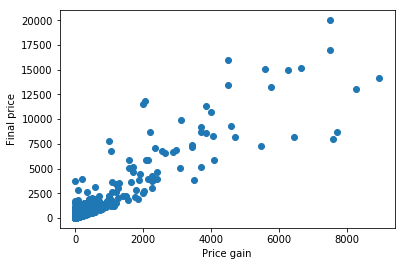

In [31]:
plt.scatter(data['PriceGain'].loc[data['Dealer'] == 1], data['FinalPrice'].loc[data['Dealer'] == 1])
plt.xlabel('Price gain')
plt.ylabel('Final price')

Text(0,0.5,'Final price')

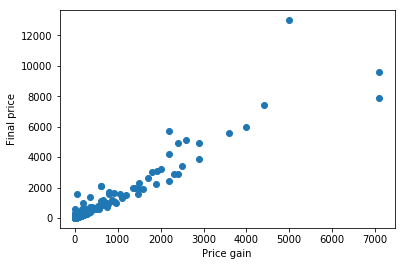

In [32]:
plt.scatter(data['PriceGain'].loc[data['Bank'] == 1], data['FinalPrice'].loc[data['Bank'] == 1])
plt.xlabel('Price gain')
plt.ylabel('Final price')

In [137]:
min_bin = min(data['PriceGain'].loc[data['Volunteer'] == 1])
max_bin = max(data['PriceGain'].loc[data['Volunteer'] == 1])
step = 100
bins = range(int(min_bin), int(max_bin+step), step)
average_values = []
for b in bins:
    a_v=sum(data['FinalPrice'].loc[(data['Volunteer'] == 1) & (data['PriceGain']> b) & (data['PriceGain']< b+step)])
    b_v=len(data['FinalPrice'].loc[(data['Volunteer'] == 1) & (data['PriceGain']> b) & (data['PriceGain']< b+step)])
    if b_v != 0:
        average_values.append((a_v/b_v,b))
    else: 
        to_sum = []
        for value in average_values:
            to_sum.append(value[0])
        v_1 = sum(to_sum)
        v_2 = len(to_sum)
        average_values.append((v_1/v_2,b))

In [139]:
plot_ave = []
label_data = []
for a in average_values:
    plot_ave.append(a[0])
    label_data.append(a[1])

Text(0,0.5,'Final price')

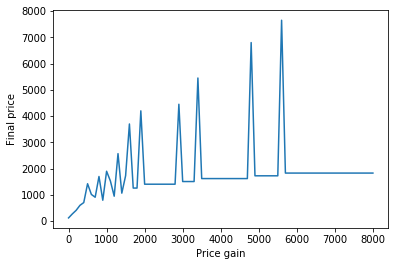

In [148]:
plt.plot(label_data,plot_ave)
plt.xlabel('Price gain')
plt.ylabel('Final price')

C:\Users\Vincent\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


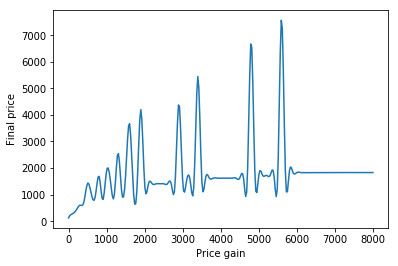

In [158]:
from scipy.interpolate import spline
T = label_data
power = plot_ave
xnew = np.linspace(min(T),max(T),300) #300 represents number of points to make between T.min and T.max

power_smooth = spline(T,power,xnew)

plt.plot(xnew,power_smooth)
plt.xlabel('Price gain')
plt.ylabel('Final price')
plt.show()

Text(0,0.5,'Final price')

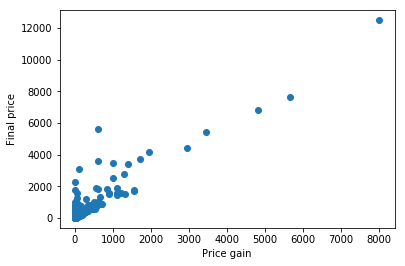

In [125]:
plt.scatter(data['PriceGain'].loc[data['Volunteer'] == 1], data['FinalPrice'].loc[data['Volunteer'] == 1])
plt.xlabel('Price gain')
plt.ylabel('Final price')

C:\Users\Vincent\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


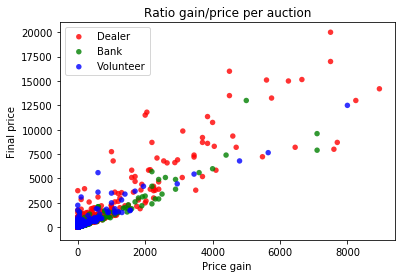

In [39]:
g1 = (data['PriceGain'].loc[data['Dealer'] == 1], data['FinalPrice'].loc[data['Dealer'] == 1])
g2 = (data['PriceGain'].loc[data['Bank'] == 1], data['FinalPrice'].loc[data['Bank'] == 1])
g3 = (data['PriceGain'].loc[data['Volunteer'] == 1], data['FinalPrice'].loc[data['Volunteer'] == 1])

data_to_plot = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("Dealer", "Bank", "Volunteer") 

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data_tp, color, group in zip(data_to_plot, colors, groups):
    x, y = data_tp
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Ratio gain/price per auction')
plt.xlabel('Price gain')
plt.ylabel('Final price')
plt.legend(loc=2)
plt.show()

## Correlation matrix

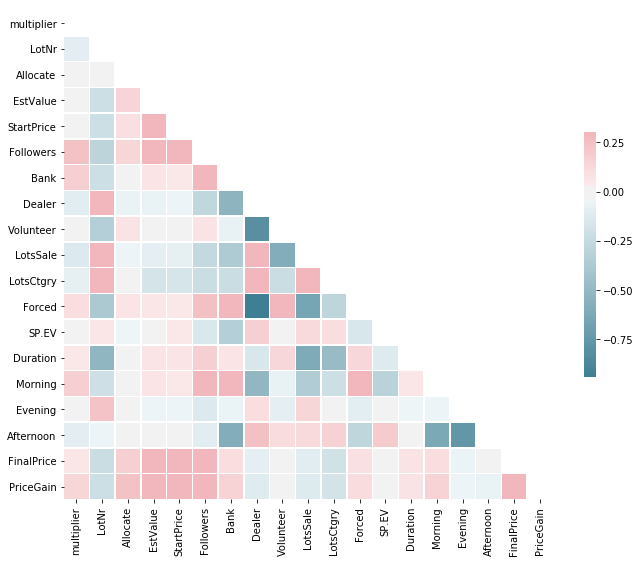

In [163]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

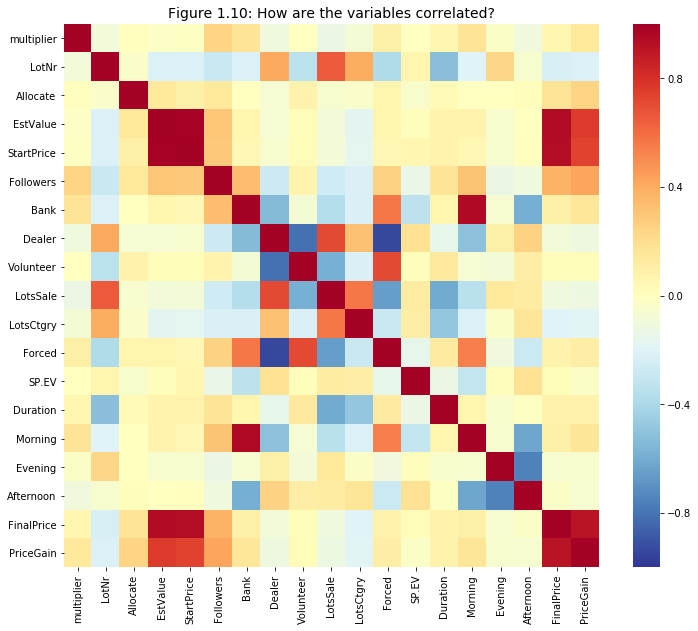

In [164]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap="RdYlBu_r", vmin=-1, vmax=1, ax=ax)
plt.title('Figure 1.10: How are the variables correlated?', size= 14);

## Different auctions methods

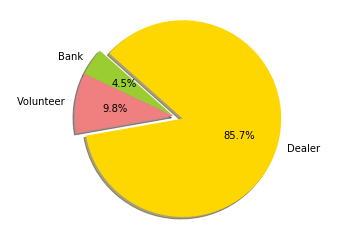

In [335]:
auctionmethods = ['Dealer','Bank','Volunteer']
distr = []
for x in auctionmethods:    
    distr.append(sum(data['AuctionMethod']== x))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(distr, explode=explode, labels=auctionmethods, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=190)
plt.axis('equal')
plt.show()

            Dealer    Volunteer         Bank
count  3929.000000  3929.000000  3929.000000
mean      0.876304     0.089336     0.034360
std       0.329276     0.285264     0.182175
min       0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     0.000000     0.000000
75%       1.000000     0.000000     0.000000
max       1.000000     1.000000     1.000000


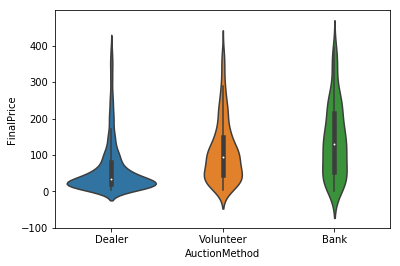

In [338]:
data_2 = data[data['FinalPrice'] < 400]
print(data_2[['Dealer','Volunteer','Bank']].describe())
sns.violinplot(x="AuctionMethod", y="FinalPrice", data=data_2)

            Dealer    Volunteer         Bank
count  4093.000000  4093.000000  4093.000000
mean      0.867090     0.093574     0.039335
std       0.339519     0.291271     0.194416
min       0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     0.000000     0.000000
75%       1.000000     0.000000     0.000000
max       1.000000     1.000000     1.000000


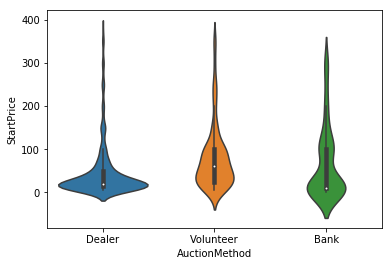

In [339]:
data_3 = data[data['StartPrice'] < 400]
print(data_3[['Dealer','Volunteer','Bank']].describe())
sns.violinplot(x="AuctionMethod", y="StartPrice", data=data_3)

            Dealer    Volunteer         Bank
count  4283.000000  4283.000000  4283.000000
mean      0.862013     0.097829     0.040159
std       0.344927     0.297117     0.196354
min       0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     0.000000     0.000000
75%       1.000000     0.000000     0.000000
max       1.000000     1.000000     1.000000


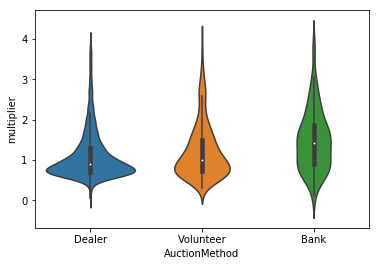

In [340]:
data_4 = data[data['multiplier'] < 4]
print(data_4[['Dealer','Volunteer','Bank']].describe())
sns.violinplot(x="AuctionMethod", y="multiplier", data=data_4)

Text(0,0.5,'Final price')

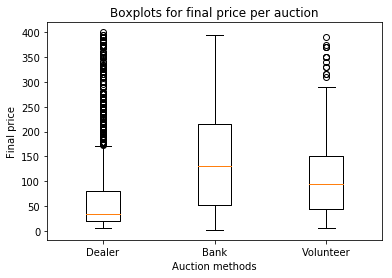

In [260]:
finals_per_auction = []
for x in auctionmethods:
    finals_per_auction.append(data_2['FinalPrice'].loc[data_2['AuctionMethod']==x].values)
plt.boxplot(finals_per_auction)
plt.title('Boxplots for final price per auction')
plt.xticks([1,2,3],auctionmethods)
plt.xlabel('Auction methods')
plt.ylabel('Final price')

Text(0,0.5,'Starting price')

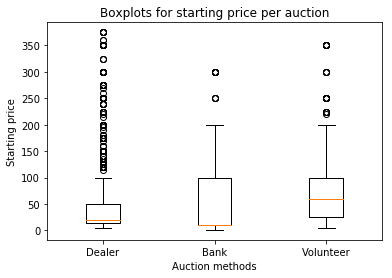

In [261]:
starting_per_auction = []
for x in auctionmethods:
    starting_per_auction.append(data_3['StartPrice'].loc[data_3['AuctionMethod']==x].values)
plt.boxplot(starting_per_auction)
plt.title('Boxplots for starting price per auction')
plt.xticks([1,2,3],auctionmethods)
plt.xlabel('Auction methods')
plt.ylabel('Starting price')

Text(0,0.5,'Multiplier')

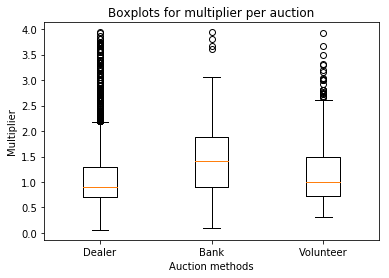

In [263]:
multiplier_per_auction = []
for x in auctionmethods:
    multiplier_per_auction.append(data_4['multiplier'].loc[data_4['AuctionMethod']==x].values)
plt.boxplot(multiplier_per_auction)
plt.title('Boxplots for multiplier per auction')
plt.xticks([1,2,3],auctionmethods)
plt.xlabel('Auction methods')
plt.ylabel('Multiplier')

## Estimated and start value

,EstValue,StartPrice
count,4414.000000,4414.000000
mean,243.189850,162.595831
std,1019.885852,671.279210
min,5.000000,1.000000
25%,25.000000,15.000000
50%,40.000000,25.000000
75%,100.000000,75.000000
max,17500.000000,12500.000000


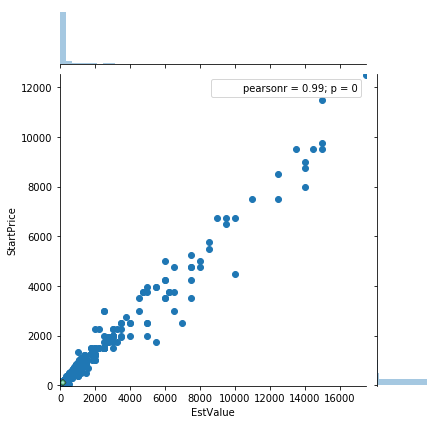

In [268]:
sns.jointplot(x="EstValue", y="StartPrice", data=data).plot_joint(sns.kdeplot)
data[["EstValue", "StartPrice"]].describe()

## Followers, duration

            Dealer    Volunteer         Bank
count  4414.000000  4414.000000  4414.000000
mean      0.856593     0.098097     0.045310
std       0.350527     0.297479     0.208008
min       0.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     0.000000     0.000000
75%       1.000000     0.000000     0.000000
max       1.000000     1.000000     1.000000


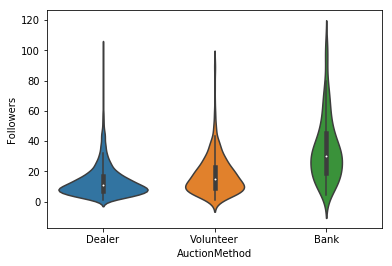

In [320]:
print(data[['Dealer','Volunteer','Bank']].describe())
sns.violinplot(x="AuctionMethod", y="Followers", data=data)

Text(0,0.5,'Duration')

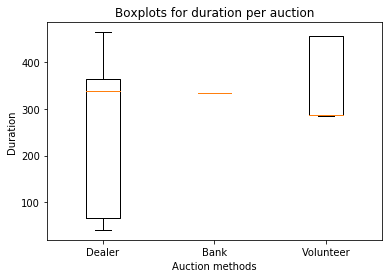

In [323]:
duration_per_auction = []
for x in auctionmethods:
    duration_per_auction.append(data['Duration'].loc[data['AuctionMethod']==x].values)
plt.boxplot(duration_per_auction)
plt.title('Boxplots for duration per auction')
plt.xticks([1,2,3],auctionmethods)
plt.xlabel('Auction methods')
plt.ylabel('Duration')

,Duration,FinalPrice
count,4414.000000,4414.000000
mean,292.927730,294.114862
std,132.359757,1160.366039
min,41.000000,2.000000
25%,286.000000,20.000000
50%,334.000000,46.000000
75%,363.000000,135.000000
max,464.000000,20000.000003


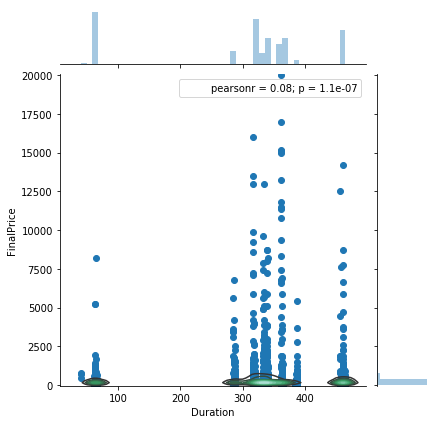

In [328]:
sns.jointplot(x="Duration", y="FinalPrice", data=data).plot_joint(sns.kdeplot)
data[["Duration", "FinalPrice"]].describe()

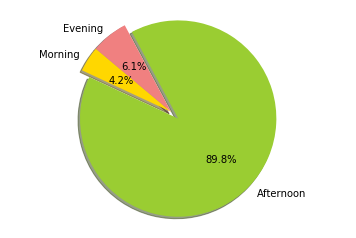

In [332]:
dayperiods = ['Morning','Afternoon','Evening']
distr_dayperiods = []
for x in dayperiods:    
    distr_dayperiods.append(sum(data['DayPeriod']== x))
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(distr_dayperiods, explode=explode, labels=dayperiods, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Text(0,0.5,'Final price')

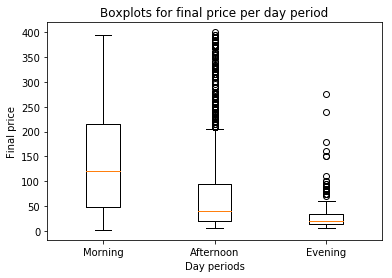

In [341]:
finals_per_dayperiod = []
for x in dayperiods:
    finals_per_dayperiod.append(data_2['FinalPrice'].loc[data_2['DayPeriod']==x].values)
plt.boxplot(finals_per_dayperiod)
plt.title('Boxplots for final price per day period')
plt.xticks([1,2,3],dayperiods)
plt.xlabel('Day periods')
plt.ylabel('Final price')